In [1]:
from bookAnalyzer import BookAnalyzer

# Инициализируем объект BookAnalyzer с базой данных books.db
analyzer = BookAnalyzer('books.db', reset=True, convert_docx_to_pdf=False, convert_odt_to_pdf=False)

In [2]:
# Обрабатываем каталог 'books' с учетом файлов типа 'pdf', исключая подкаталог 'exclude_dir'
#analyzer.process_directory('books', ['odt', 'docx', 'pdf', 'epub'], ['exclude_dir'], 5, convert_docx_to_pdf=False, convert_odt_to_pdf=True)
analyzer.process_directory('books', ['docx'], ['exclude_dir'], 5, convert_docx_to_pdf=True, convert_odt_to_pdf=True)

In [23]:
import sqlite3
from prettytable import from_db_cursor

conn = sqlite3.connect('books.db')
cursor = conn.cursor()

# Пример запроса: получаем все книги
cursor.execute("SELECT favorite, title, author, file_ext, file_path, file_size, num_pages, metadata FROM books")
from_db_cursor(cursor)

favorite,title,author,file_ext,file_path,file_size,num_pages,metadata
0,Без картинок,Паша Киста,.epub,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект\kurs_project_4\books\96652827.epub,1202551,2,"{'http://purl.org/dc/elements/1.1/': {'title': [('Без картинок', {})], 'subject': [('Поэзия', {})], 'creator': [('Паша Киста', {'{http://www.idpf.org/2007/opf}file-as': 'Киста, Паша', '{http://www.idpf.org/2007/opf}role': 'aut'})], 'date': [('2021-01-14', {})], 'identifier': [('7976d434-8150-41f6-b2de-4e1ddeffec37', {'id': 'dcidid', '{http://www.idpf.org/2007/opf}scheme': 'ID'})], 'language': [('ru', {})], 'description': [('Для усиления эффекта я, почти всегда, прикрепляю картинки или мемы к постам со своими стишатами. Здесь же не будет ни единой пикчи. Только поэзия. Потому что даже самые подходящие картинки могут испортить произведения, которые представлены в этом небольшом сборнике. Делать крупный сборник я не вижу смысла совсем. Просто из-за спроса. Да и не время сейчас для такого. Поэтому я собрал стишата, которые написались за короткий период времени. Буквально за полмесяца. Стишата, в которых много личного, много нового и того, чего я не мог раньше выпустить. Долго молчать у меня не получается. Очень хочу вам показать это.Содержит нецензурную брань.\n', {})], 'publisher': [('ООО «ЛитРес», www.litres.ru', {})]}, 'http://purl.org/dc/terms/': {}, 'http://www.w3.org/2001/XMLSchema-instance': {}, 'http://www.idpf.org/2007/opf': {'cover': [(None, {'name': 'cover', 'content': 'coverimage'})]}, 'http://www.w3.org/1999/XSL/Format': {}, 'http://www.gribuser.ru/xml/fictionbook/2.0': {}, 'http://www.w3.org/1999/xlink': {}}"
0,Как прожить сто лет и изящно состариться,Джеймс Мартин Пиблз,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект\kurs_project_4\books\98954389.a4.pdf,316952,20,"{'/Creator': 'Apache FOP Version svn-trunk', '/CreationDate': ""D:20230515224139+03'00'"", '/Producer': 'Apache FOP Version svn-trunk', '/Subject': 'home_health', '/Author': 'Джеймс Мартин Пиблз', '/Title': 'Как прожить сто лет и изящно состариться'}"
0,Мастер и Маргарита,Михаил Афанасьевич Булгаков,.epub,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект\kurs_project_4\books\avidreaders.ru__master-i-margarita.epub,998383,38,"{'http://calibre.kovidgoyal.net/2009/metadata': {'timestamp': [(None, {'name': 'calibre:timestamp', 'content': '2021-12-19T09:31:30.941298+00:00'})], 'series': [(None, {'name': 'calibre:series', 'content': 'Эксмо-Классика'})]}, 'http://purl.org/dc/elements/1.1/': {'title': [('Мастер и Маргарита', {})], 'subject': [('prose_classic', {})], 'date': [('2006-12-15T00:00:00+00:00', {})], 'creator': [('Михаил Афанасьевич Булгаков', {'{http://www.idpf.org/2007/opf}file-as': 'Unknown', '{http://www.idpf.org/2007/opf}role': 'aut'})], 'description': [('Роман «Мастер и Маргарита» – визитная карточка Михаила Афанасьевича Булгакова. Более десяти лет Булгаков работал над книгой, которая стала его романом-судьбой, романом-завещанием.В «Мастере и Маргарите» есть все: веселое озорство и щемящая печаль, романтическая любовь и колдовское наваждение, магическая тайна и безрассудная игра с нечистой силой.', {})], 'contributor': [('calibre (3.44.0) [https://calibre-ebook.com]', {'{http://www.idpf.org/2007/opf}role': 'bkp'})], 'identifier': [('5-699-15500-7', {'{http://www.idpf.org/2007/opf}scheme': 'ISBN'}), ('afdabfc0-2348-4604-806f-a8ca92071379', {'id': 'uuid_id', '{http://www.idpf.org/2007/opf}scheme': 'uuid'})], 'language': [('ru', {})], 'publisher': [('Эксмо', {})]}, 'http://purl.org/dc/terms/': {}, 'http://www.idpf.org/2007/opf': {'cover': [(None, {'name': 'cover', 'content': 'cover'})]}, 'http://www.w3.org/2001/XMLSchema-instance': {}}"
0,Переход в другой мир. Учеба#2,Pereploot,.epub,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект\kurs_project_4\books\book.epub,1620531,27,"{'http://www.idpf.org/2007/opf': {'FB2.book-info.date': [(None, {'name': 'FB2.book-info.date', 'content': '2021-12-10'})], 'FB2.document-info.program-used': [(None, {

In [4]:
# Закрываем соединение
conn.close()

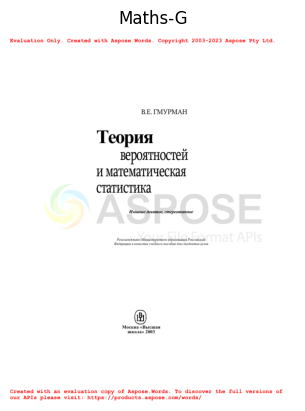

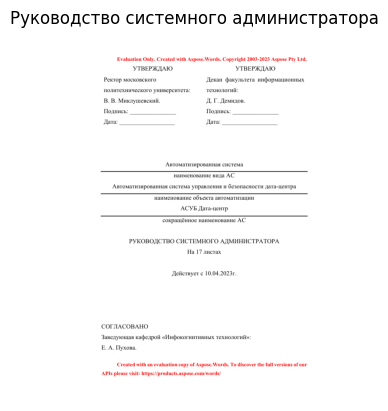

In [5]:
analyzer.display_previews()

In [6]:
analyzer.search_books_by_author('Мартин')

[]

In [7]:
analyzer.search_books_by_title('book')

[]

In [8]:
analyzer.search_books_by_extension('.odt')

[]

In [9]:
analyzer.get_largest_books(limit=5, offset=0)

[('Maths-G', 'User', '1.2 МБ', 'books\\Maths-G.docx', 0),
 ('Руководство системного администратора',
  'Глеб Назаренко',
  '40.8 КБ',
  'books\\Руководство системного администратора.docx',
  0)]

In [10]:
analyzer.get_books_with_most_pages(limit=5, offset=0)

[('Руководство системного администратора',
  'Глеб Назаренко',
  14,
  'books\\Руководство системного администратора.docx',
  0),
 ('Maths-G', 'User', 7, 'books\\Maths-G.docx', 0)]

In [11]:
analyzer.get_recently_added_books(limit=5, offset=0)

[('Руководство системного администратора',
  'Глеб Назаренко',
  'books\\Руководство системного администратора.docx',
  0),
 ('Maths-G', 'User', 'books\\Maths-G.docx', 0)]

In [12]:
analyzer.get_books_without_author()

[]

In [13]:
analyzer.get_books_without_metadata()

[]

In [14]:
analyzer.get_file_extension_statistics()

[('.docx', 2)]

In [15]:
analyzer.search_books_by_metadata("Apache")

[]

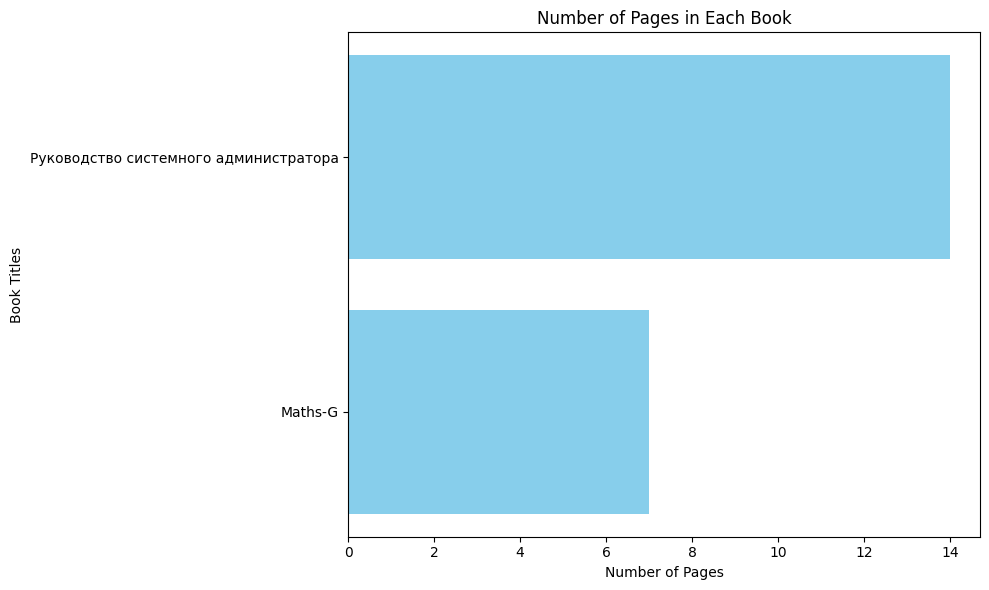

In [16]:
analyzer.plot_books_pages()